https://www.kaggle.com/datasets/sijovm/atpdata


In [152]:
import pandas as pd #data manipulation and analysis and data frames
import numpy as np #numerical operations
import seaborn as sns #data visualization
import statsmodels.api as sm #statistical computing
from sklearn.linear_model import LinearRegression #LinearRegression model from scikit-learn
from sklearn.model_selection import train_test_split #splitting the data into train and test sets

In [5]:
from google.colab import files
tennis = files.upload()

Saving atp_matches_till_2022.csv to atp_matches_till_2022.csv


In [41]:
df = pd.read_csv("atp_matches_till_2022.csv")

In [42]:
## this dataset contains 188161 observation with 49 columns
df.shape

(188161, 49)

In [43]:
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188156,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,20220304,4,209362,NaN,NaN,...,68.0,42.0,12.0,10.0,11.0,13.0,1103.0,9.0,1130.0,8.0
188157,2022-M-DC-2022-WG2-PO-GRE-JAM-01,Davis Cup WG2 PO: GRE vs JAM,Clay,4,D,20220304,5,202065,NaN,NaN,...,56.0,40.0,20.0,15.0,4.0,8.0,808.0,23.0,1390.0,4.0
188158,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,1,138846,NaN,NaN,...,54.0,29.0,8.0,11.0,6.0,10.0,1059.0,10.0,1881.0,1.0
188159,2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,2,209409,NaN,NaN,...,39.0,24.0,7.0,10.0,5.0,9.0,NaN,NaN,NaN,NaN


In [46]:
##focus on games in Grand Slam level tournament and after year 2000
newdf = df[(df['tourney_level'] == 'G') & (df['tourney_date'] >= 20000101)]

In [49]:
newdf.dtypes

tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

<ipython-input-50-acdb3e51fdc3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(newdf.corr())


<Axes: >

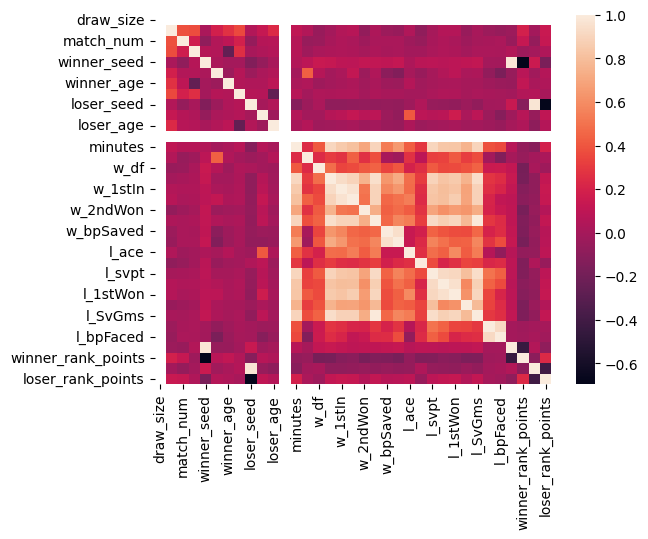

In [50]:
sns.heatmap(newdf.corr())

In [35]:
newdf.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,11557.0,1.155700e+04,11557.000000,11557.000000,6319.000000,11551.000000,11557.000000,11557.000000,2703.000000,11516.000000,...,11517.000000,11517.000000,11517.000000,11518.000000,11517.000000,11517.000000,11552.000000,11552.000000,11534.000000,11534.000000
mean,128.0,2.010954e+07,117.114995,107295.991866,12.740624,186.362566,26.553240,107400.678723,16.779134,185.578413,...,69.002518,46.144829,20.976470,17.385570,6.790657,12.113484,48.659193,2182.216759,87.884775,1019.313248
std,0.0,6.603055e+04,175.978666,14683.225817,9.240173,6.814916,3.962843,14850.379654,9.113056,6.821807,...,22.340650,17.380232,8.632337,4.911836,3.802390,4.668265,62.122051,2554.929671,92.941734,1212.079301
min,128.0,2.000012e+07,1.000000,100644.000000,1.000000,168.000000,16.200000,100644.000000,1.000000,168.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,2.000000
25%,128.0,2.005062e+07,46.000000,103580.000000,4.000000,183.000000,23.600000,103451.000000,9.000000,180.000000,...,53.000000,34.000000,15.000000,14.000000,4.000000,9.000000,10.000000,699.000000,36.000000,458.000000
50%,128.0,2.011052e+07,91.000000,104386.000000,11.000000,185.000000,26.300000,104312.000000,17.000000,185.000000,...,66.000000,44.000000,20.000000,17.000000,6.000000,12.000000,30.000000,1230.000000,70.000000,696.000000
75%,128.0,2.017012e+07,126.000000,105138.000000,20.000000,190.000000,29.200000,105238.000000,25.000000,190.000000,...,83.000000,57.000000,27.000000,21.000000,9.000000,15.000000,67.000000,2442.750000,107.000000,1100.000000
max,128.0,2.022083e+07,1701.000000,210013.000000,35.000000,211.000000,40.800000,210530.000000,35.000000,211.000000,...,328.000000,284.000000,101.000000,91.000000,27.000000,35.000000,1098.000000,16950.000000,1415.000000,16950.000000


In [55]:
newdf.describe()[['draw_size', 'winner_seed', 'loser_seed', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht']].loc[['mean','min', 'max']]

,draw_size,winner_seed,loser_seed,winner_age,loser_age,winner_ht,loser_ht
mean,128.0,12.740624,16.779134,26.55324,26.654616,186.362566,185.578413
min,128.0,1.000000,1.000000,16.20000,15.900000,168.000000,168.000000
max,128.0,35.000000,35.000000,40.80000,42.500000,211.000000,211.000000


In [56]:
winner_age = newdf[['winner_age']]
loser_age = newdf[['loser_age']]
winner_age[['win_or_lose']] = True
loser_age[['win_or_lose']] = False
winner = winner_age.rename(columns = {'winner_age': 'Age'})
loser = loser_age.rename(columns = {'loser_age': 'Age'})

<ipython-input-56-088aaa8c3463>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winner_age[['win_or_lose']] = True
<ipython-input-56-088aaa8c3463>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loser_age[['win_or_lose']] = False


In [154]:
age = pd.concat([winner, loser])
age

,Age,win_or_lose
121447,30.0,True
121448,26.2,True
121449,22.0,True
121450,24.7,True
121451,20.6,True
...,...,...
187461,21.0,False
187462,24.8,False
187463,26.2,False
187464,24.6,False


In [58]:
age.corr()

,Age,win_or_lose
Age,1.000000,-0.012647
win_or_lose,-0.012647,1.000000


In [170]:
X_simple = sm.add_constant(age[['Age']])
y_simple =age[['win_or_lose']]
simple_model = sm.OLS(y_simple, X_simple).fit()

In [171]:
print("Simple Linear Regression Results:") #statsmodel detailed results
print(simple_model.summary())
print()

Simple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:            win_or_lose   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.697
Date:                Tue, 23 Jan 2024   Prob (F-statistic):             0.0545
Time:                        09:12:58   Log-Likelihood:                -16774.
No. Observations:               23114   AIC:                         3.355e+04
Df Residuals:                   23112   BIC:                         3.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5

(array([ 156., 1863., 4221., 5605., 5346., 3521., 1680.,  583.,  127.,
          12.]),
 array([15.9 , 18.56, 21.22, 23.88, 26.54, 29.2 , 31.86, 34.52, 37.18,
        39.84, 42.5 ]),
 <BarContainer object of 10 artists>)

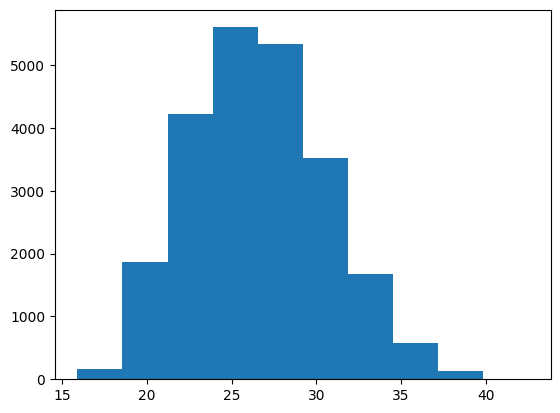

In [34]:
plt.hist(age['Age'])

In [126]:
age_group = {'1':[],
             '2':[],
             '3':[],
             '4':[],
             '5':[],
             '6':[],
             '7':[],
             '8':[]}

In [127]:
##To study the relationship between age and winning
##we decide to categorize players in different age group and find the win rate of each age group
##from the histogram and previous analysis, we learn that players' age is ranging from 15-45
for i, row in age.iterrows():
    if row['Age'] <= 18:
      age_group['1'].append(row['win_or_lose'])
    if 18 < row['Age'] <= 22:
      age_group['2'].append(row['win_or_lose'])
    if 22 < row['Age'] <= 26:
      age_group['3'].append(row['win_or_lose'])
    if 26 < row['Age'] <= 30:
      age_group['4'].append(row['win_or_lose'])
    if 30 < row['Age'] <= 34:
      age_group['5'].append(row['win_or_lose'])
    if 34 < row['Age'] <= 38:
      age_group['6'].append(row['win_or_lose'])
    if 38 < row['Age'] <= 42:
      age_group['7'].append(row['win_or_lose'])
    if 42 < row['Age']:
      age_group['8'].append(row['win_or_lose'])


In [128]:
print(np.mean(age_group['1']),
      np.mean(age_group['2']),
      np.mean(age_group['3']),
      np.mean(age_group['4']),
      np.mean(age_group['5']),
      np.mean(age_group['6']),
      np.mean(age_group['7']),
      np.mean(age_group['8'])
)

0.30666666666666664 0.5033557046979866 0.5129032258064516 0.49744931327665143 0.4831099195710456 0.4897260273972603 0.43859649122807015 0.0


In [145]:
win_rate_by_age_group = {'under18':round(np.mean(age_group['1']), 3),
                         '18-22':round(np.mean(age_group['2']), 3),
                         '22-26':round(np.mean(age_group['3']), 3),
                         '26-30':round(np.mean(age_group['4']), 3),
                         '30-34':round(np.mean(age_group['5']), 3),
                         '34-38':round(np.mean(age_group['6']), 3),
                         '38-42':round(np.mean(age_group['7']), 3),
                         'over42':round(np.mean(age_group['8']), 3)
                         }

In [150]:
win_rate_by_age_group_df = pd.DataFrame(list(win_rate_by_age_group.items()), columns=['Age Group', 'Win Rate'])
win_rate_by_age_group_df

,Age Group,Win Rate
0,under18,0.307
1,18-22,0.503
2,22-26,0.513
3,26-30,0.497
4,30-34,0.483
5,34-38,0.490
6,38-42,0.439
7,over42,0.000


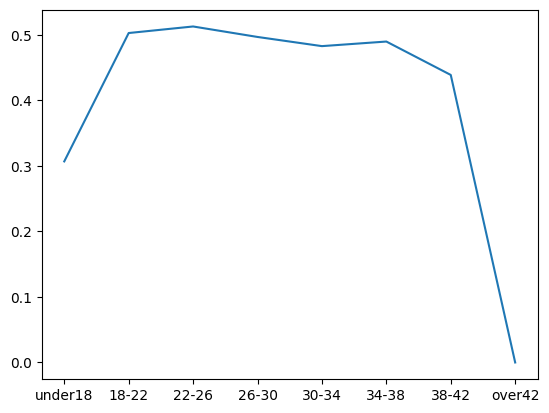

In [153]:
plt.plot('Age Group', 'Win Rate', data = win_rate_by_age_group_df)
plt.show()